In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
data = pd.read_csv(url, skiprows=23, low_memory=False)

print(data.head())


                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


[Reference: Pandas read_csv: low_memory and dtype options](https://www.geeksforgeeks.org/pandas-read_csv-low_memory-and-dtype-options/)<br/>
[Reference: Skip rows during csv import pandas](https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas)

In [429]:
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y %H:%M', errors='coerce')

[Reference: How to Specify Format in pandas.to_datetime](https://www.statology.org/pandas-to-datetime-format/) <br/>

## Plot the temperature

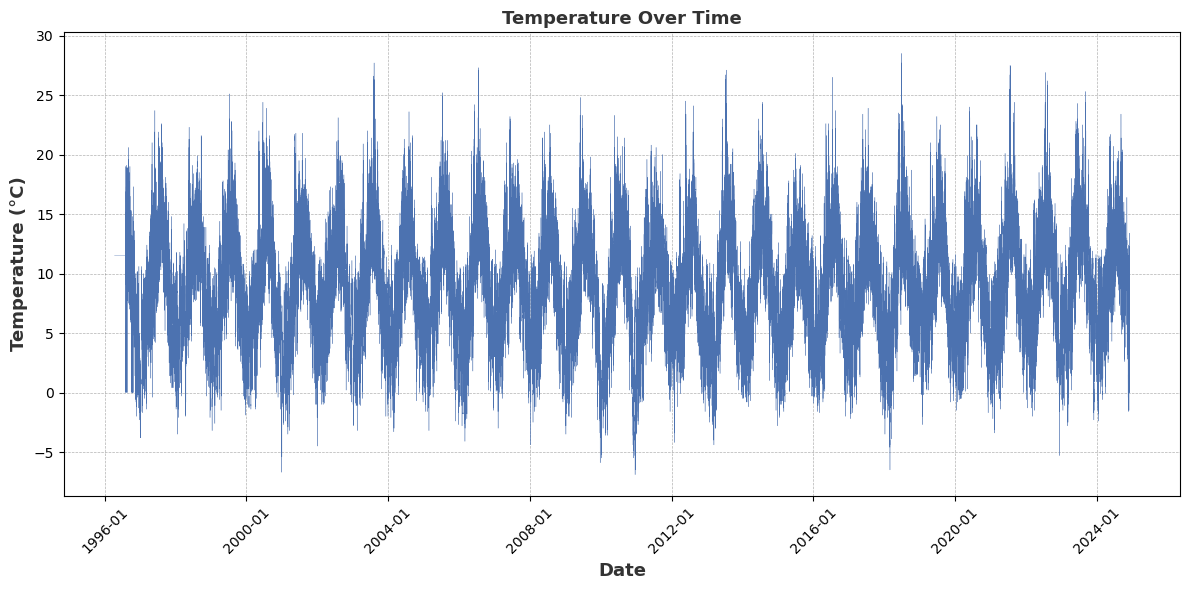

In [430]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['temp'], label='Temperature (°C)',color='#4C72B0', linestyle='-', linewidth=.25,)
plt.xlabel('Date',fontsize=13, fontweight='bold', color='#333333')
plt.ylabel('Temperature (°C)',fontsize=13, fontweight='bold', color='#333333')
plt.title('Temperature Over Time',fontsize=13, fontweight='bold', color='#333333')
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[Reference: Matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)<br/>
[Reference: Matplotlib Plotting](https://www.w3schools.com/python/matplotlib_plotting.asp)<br/>
[Reference: Matplotlib.pyplot.grid](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.grid.html)

## Plot the mean temperature each day

In [431]:
daily_mean_temp = data.groupby(data['date'].dt.date)['temp'].mean()

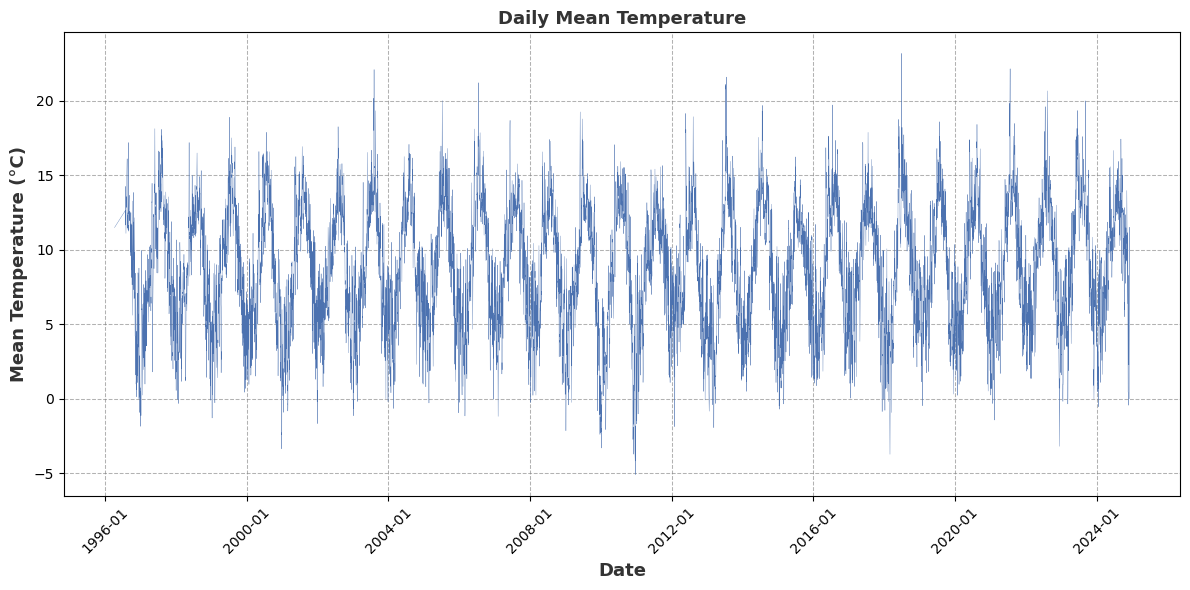

In [432]:
daily_mean_temp.plot(figsize=(12, 6),color='#4C72B0', linestyle='-', linewidth=.25)
plt.xlabel('Date',fontsize=13, fontweight='bold', color='#333333')
plt.ylabel('Mean Temperature (°C)',fontsize=13, fontweight='bold', color='#333333')
plt.title('Daily Mean Temperature',fontsize=13, fontweight='bold', color='#333333')
plt.grid(visible=True, linestyle='--', linewidth=0.75, color='gray', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[Reference: How to handle time series data with ease using groupby](https://pandas.pydata.org/pandas-docs/version/1.3.1/getting_started/intro_tutorials/09_timeseries.html)<br/>
[Reference: Matplotlib Plotting](https://www.w3schools.com/python/matplotlib_plotting.asp)<br/>
[Reference: How to Plot a Pandas Series ](https://www.statology.org/plot-pandas-series/)</br>
[Reference: Matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)<br/>
[Reference: Matplotlib.pyplot.grid](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.grid.html)

## Plot the mean temperature for each month

In [433]:
monthly_mean_temp = data.resample('ME', on='date')['temp'].mean()

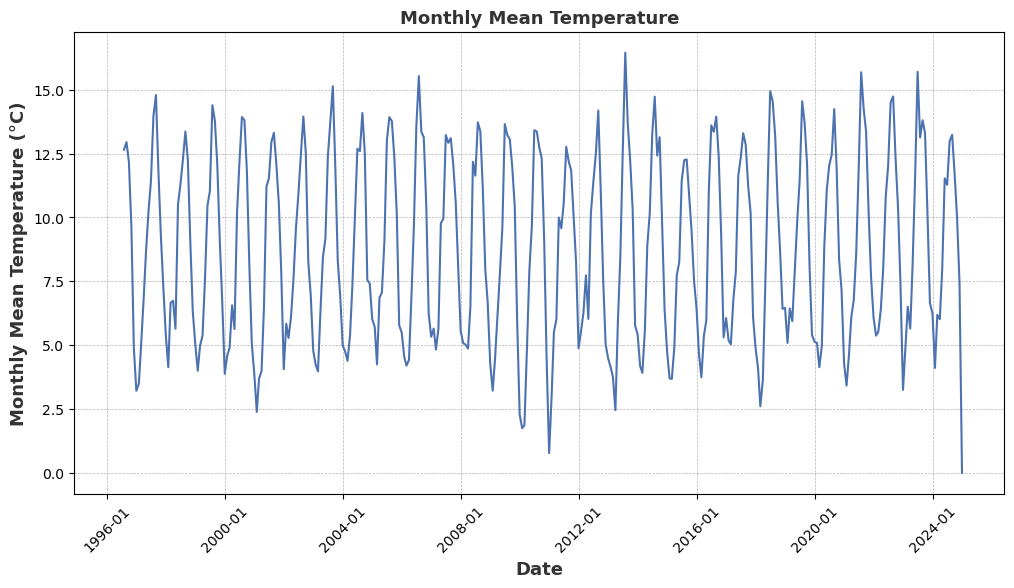

In [434]:

plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp.values, color='#4C72B0', linestyle='-', linewidth=1.5)
plt.xlabel('Date',fontsize=13, fontweight='bold', color='#333333')
plt.ylabel('Monthly Mean Temperature (°C)',fontsize=13, fontweight='bold', color='#333333')
plt.title('Monthly Mean Temperature',fontsize=13, fontweight='bold', color='#333333')
plt.grid(visible=True, linestyle='--', linewidth=.5, color='gray', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

[Reference: How to handle time series data with ease using groupby](https://pandas.pydata.org/pandas-docs/version/1.3.1/getting_started/intro_tutorials/09_timeseries.html)<br/>
[Reference: Matplotlib Plotting](https://www.w3schools.com/python/matplotlib_plotting.asp)<br/>
[Reference: How to Plot a Pandas Series ](https://www.statology.org/plot-pandas-series/)</br>
[Reference: Matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)<br/>
[Reference: Matplotlib.pyplot.grid](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.grid.html)<br/>
[Reference: Pandas Resample With resample() and asfreq()](https://www.datacamp.com/tutorial/pandas-resample-asfreq)<br/>
[Reference: Pandas.DataFrame.set_index](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.DataFrame.set_index.html) <br/>

## Plot the windspeed

In [435]:
blank_wdsp_count = data['wdsp'].str.match(r'^ *$').sum()
print(f"Number of blank fields in 'wdsp': {blank_wdsp_count}")


Number of blank fields in 'wdsp': 50


[Reference: A Guide to R Regular Expressions](https://www.datacamp.com/tutorial/regex-r-regular-expressions-guide)<br/>
[Reference: What Are Python Raw Strings?](https://realpython.com/python-raw-strings/)

As there are only 50 missing fields out of over 65,000 entries, I have decided to drop the blank values rather than interpolate or replace them, as their impact on the analysis is negligible.

In [436]:
data['wdsp'] = data['wdsp'].replace(r'^ *$', np.nan, regex=True)

data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce')

nan_count = data['wdsp'].isna().sum()
print(f"Number of NaN entries in 'wdsp': {nan_count}")

Number of NaN entries in 'wdsp': 50


[Reference: Replace values in Pandas dataframe using regex](https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/)<br/>
[Reference: Python | pandas.to_numeric method](https://www.geeksforgeeks.org/python-pandas-to_numeric-method/)


In [437]:
# Drop rows with NaN values in the 'wdsp' column to clean the data
cleaned_wdsp_data = data.dropna(subset=['wdsp']).copy()

nan_count = cleaned_wdsp_data['wdsp'].isna().sum()
print(f"Number of NaN entries in 'wdsp': {nan_count}")

Number of NaN entries in 'wdsp': 0


In [438]:
cleaned_wdsp_data.set_index('date', inplace=True)

[Reference: Pandas: How to Replace Zero with NaN](https://www.statology.org/pandas-replace-0-with-nan/)<br/>
[Reference: Python | pandas.to_numeric method](https://www.geeksforgeeks.org/python-pandas-to_numeric-method/)<br/>
[Reference: Pandas DataFrame copy() Method](https://www.w3schools.com/python/pandas/ref_df_copy.asp)<br/>
[Reference: Pandas.DataFrame.set_index](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.DataFrame.set_index.html) <br/>

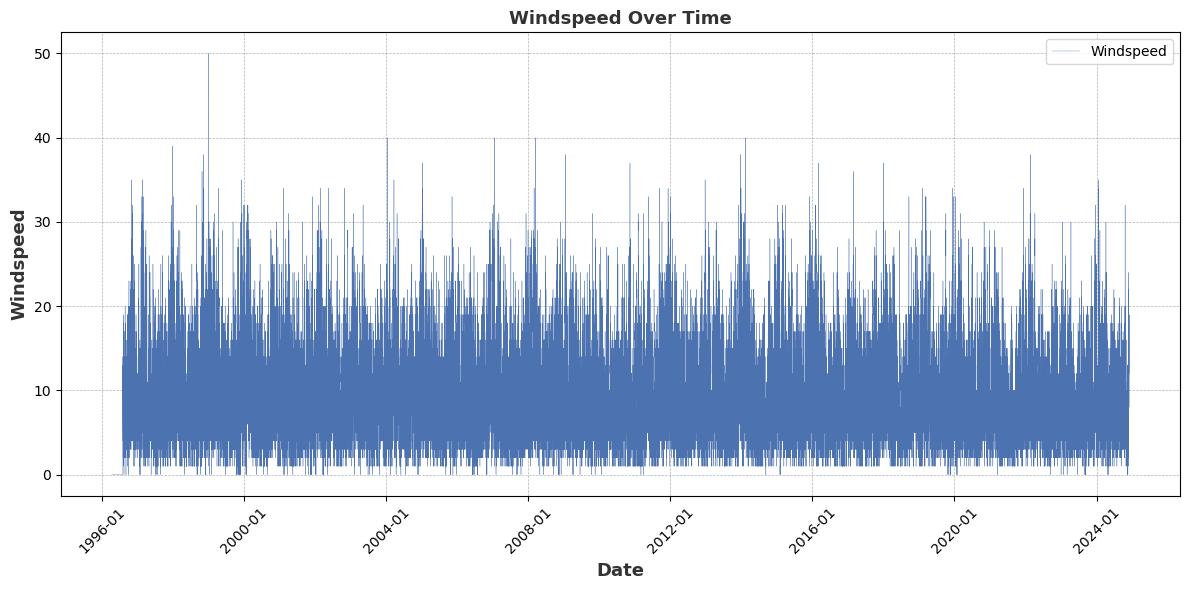

In [439]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_wdsp_data.index, cleaned_wdsp_data['wdsp'], label='Windspeed', color='#4C72B0', linestyle='-', linewidth=0.25)
plt.xlabel('Date', fontsize=13, fontweight='bold', color='#333333')
plt.ylabel('Windspeed', fontsize=13, fontweight='bold', color='#333333')
plt.title('Windspeed Over Time', fontsize=13, fontweight='bold', color='#333333')
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


[Reference: Matplotlib Plotting](https://www.w3schools.com/python/matplotlib_plotting.asp)<br/>
[Reference: Matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)<br/>
[Reference: Matplotlib.pyplot.grid](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.grid.html)

## Plot rolling windspeed over 24hours

In [440]:

cleaned_wdsp_data['wdsp_rolling_24h'] = cleaned_wdsp_data['wdsp'].rolling(window=24).mean()

[Reference: Pandas – Rolling mean by time interval](https://www.geeksforgeeks.org/pandas-rolling-mean-by-time-interval/)

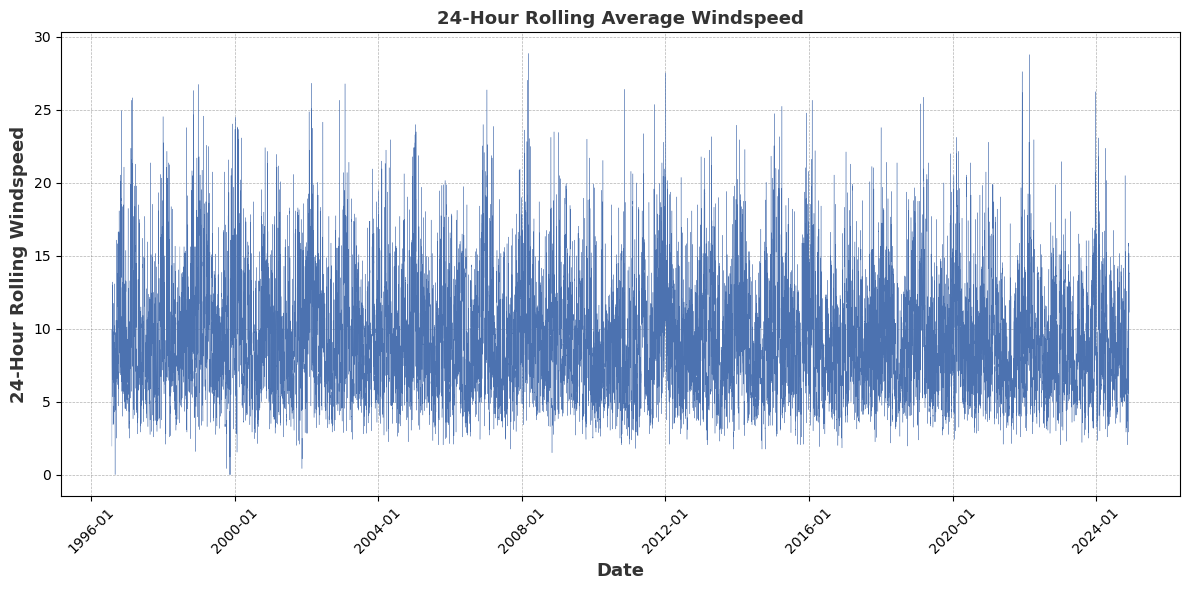

In [441]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_wdsp_data.index,cleaned_wdsp_data['wdsp_rolling_24h'], label='24-Hour Rolling Average',color='#4C72B0', linestyle='-', linewidth=.25)
plt.xlabel('Date',fontsize=13, fontweight='bold', color='#333333')
plt.ylabel('24-Hour Rolling Windspeed',fontsize=13, fontweight='bold', color='#333333')
plt.title('24-Hour Rolling Average Windspeed',fontsize=13, fontweight='bold', color='#333333')
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[Reference: Matplotlib Plotting](https://www.w3schools.com/python/matplotlib_plotting.asp)<br/>
[Reference: Matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)<br/>
[Reference: Matplotlib.pyplot.grid](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.grid.html)

## The max windspeed for each day

In [442]:
daily_max_windspeed = cleaned_wdsp_data['wdsp'].resample('D').max()

[Reference: Pandas.core.resample.Resampler.max](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.max.html) <br/>


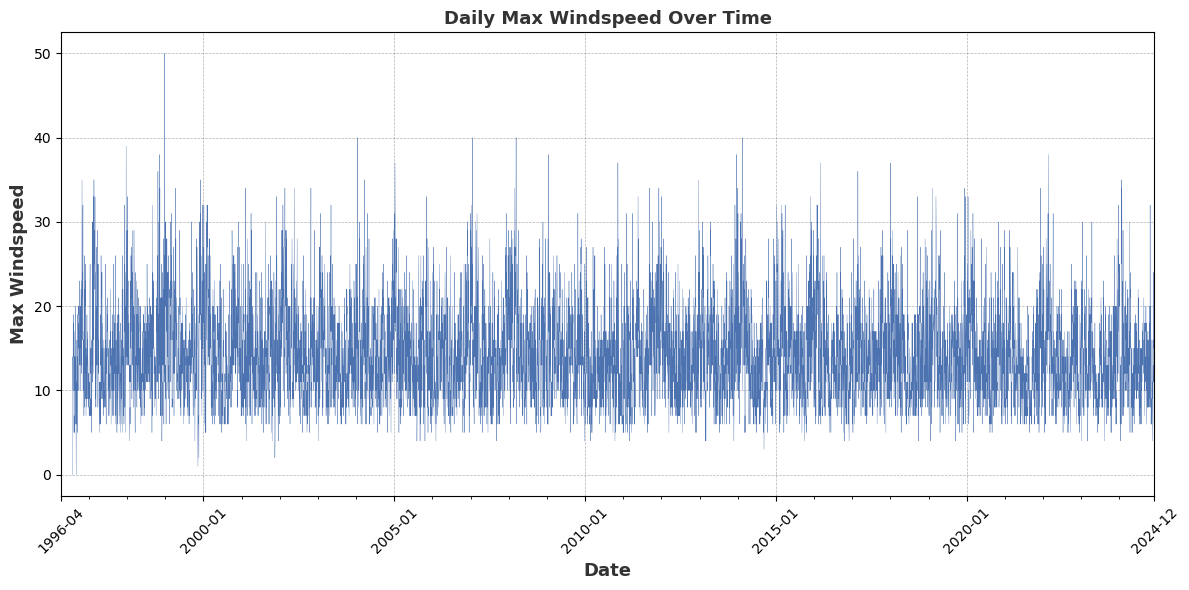

In [443]:
daily_max_windspeed.plot(figsize=(12, 6), color='#4C72B0', linestyle='-', linewidth=0.25)
plt.xlabel('Date', fontsize=13, fontweight='bold', color='#333333')
plt.ylabel('Max Windspeed', fontsize=13, fontweight='bold', color='#333333')
plt.title('Daily Max Windspeed Over Time', fontsize=13, fontweight='bold', color='#333333')
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[Reference: Matplotlib Plotting](https://www.w3schools.com/python/matplotlib_plotting.asp)<br/>
[Reference: How to Plot a Pandas Series ](https://www.statology.org/plot-pandas-series/)</br>
[Reference: Matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)<br/>
[Reference: Matplotlib.pyplot.grid](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.grid.html)

## Plot monthly mean of daily max windspeeds

In [444]:
monthly_mean_daily_max_windspeed = daily_max_windspeed.resample('ME').mean()

[Reference: Pandas.core.resample.Resampler.max](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.max.html) <br/>
[Reference: Pandas – Rolling mean by time interval](https://www.geeksforgeeks.org/pandas-rolling-mean-by-time-interval/)

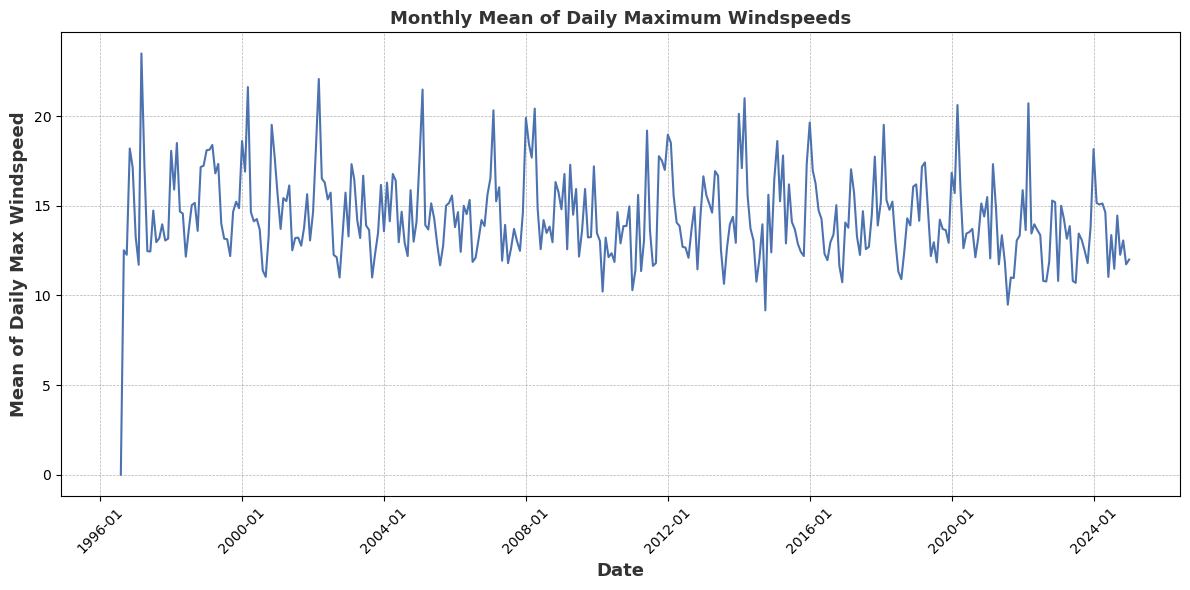

In [445]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_daily_max_windspeed.index,  monthly_mean_daily_max_windspeed.values, color='#4C72B0', linestyle='-', linewidth=1.5)
plt.xlabel('Date', fontsize=13, fontweight='bold', color='#333333')
plt.ylabel('Mean of Daily Max Windspeed', fontsize=13, fontweight='bold', color='#333333')
plt.title('Monthly Mean of Daily Maximum Windspeeds', fontsize=13, fontweight='bold', color='#333333')
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[Reference: Matplotlib Plotting](https://www.w3schools.com/python/matplotlib_plotting.asp)<br/>
[Reference: How to Plot a Pandas Series ](https://www.statology.org/plot-pandas-series/)</br>
[Reference: Matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)<br/>
[Reference: Matplotlib.pyplot.grid](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.grid.html)<br/>
[Reference: Pandas.DataFrame.set_index](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.DataFrame.set_index.html) <br/>